In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


"""df = pd.read_csv(
    'files/results_pct_20201103.txt', sep='    ',header=None, keep_default_na=False)
df.head()"""

# shrav already did it

"df = pd.read_csv(\n    'files/results_pct_20201103.txt', sep='    ',header=None, keep_default_na=False)\ndf.head()"

In [2]:
#importation
df = pd.read_csv(
    'files/voter_stats_20201103.txt', sep='    ',header=None, keep_default_na=False)
df = df[0]
df = df.str.split(pat = '\t')

<ipython-input-2-1e8ed357cb4a>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(


In [3]:
# type construction
final_data = [x for x in df]
final_data = np.array(final_data)
voter_data = pd.DataFrame(final_data)
voter_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
1,IREDELL,11/03/2020,voter,EM,EM,DEM,U,HL,M,Age 41 - 65,1,05/17/2021
2,GUILFORD,11/03/2020,voter,G60,G60,LIB,W,NL,M,Age 18 - 25,1,05/17/2021
3,WAKE,11/03/2020,voter,07-12,07-12,REP,W,UN,F,Age 41 - 65,12,05/17/2021
4,MOORE,11/03/2020,voter,RBN,RBN,UNA,U,UN,U,Age 26 - 40,6,05/17/2021


In [4]:
#column renaming
# link to data map: https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/layout_voter_stats.txt
#county_desc	election_date	stats_type	precinct_abbrv	vtd_abbrv	party_cd	race_code	ethnic_code	sex_code	age	total_voters	update_date
voter_data = voter_data.rename(columns={0: 'county_desc', 1: 'election_date', 2: 'stats_type', 3: 'precinct_abbrv', 4: 'vtd_abbrv', 5: 'party_cd', 6: 'race_code',
7: 'ethnic_code', 8: 'sex_code', 9: 'age', 10: 'total_voters', 11: 'update_date'})
voter_data.head()

"""A	               ASIAN
B	               BLACK or AFRICAN AMERICAN
I	               INDIAN AMERICAN or ALASKA NATIVE
M	               TWO or MORE RACES
O	               OTHER
U	               UNDESIGNATED
W	               WHITE"""
race_changes = []
for x in voter_data['race_code']:
    if x == 'U':
        race_changes.append('Undesignated')
    elif x == 'B':
        race_changes.append('Black')
    elif x == 'I':
        race_changes.append('Indian American')
    elif x == 'M':
        race_changes.append('Biracial')
    elif x == 'O':
        race_changes.append('Other')
    elif x == 'W':
        race_changes.append('White')
    elif x == 'A':
        race_changes.append('Asian')
    else:
        race_changes.append(np.NaN)
voter_data['race_code'] = pd.Series(race_changes)

<AxesSubplot:xlabel='county_desc', ylabel='race_code'>

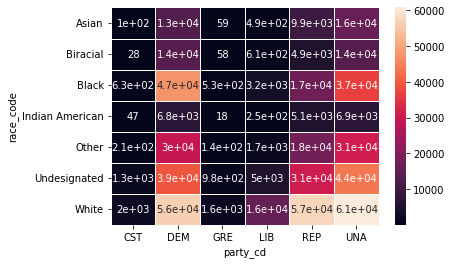

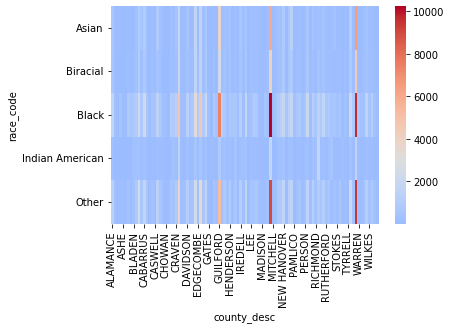

In [5]:
'''
# graphs
sns.histplot(data = voter_data, x = 'party_cd', hue = 'party_cd')

plt.figure()

sns.histplot(data = voter_data, x = 'race_code', hue = 'race_code')

plt.figure()

sns.histplot(data = voter_data, x = 'county_desc', hue = 'county_desc')
plt.legend([],[], frameon=False)
'''
#sorted_total_voters = voter_data.sort_values('total_voters')

#sns.histplot(data = sorted_total_voters, x = 'county_desc', hue = 'county_desc')
#plt.legend([],[], frameon=False)
race_party = voter_data.pivot_table(index = "race_code", columns = "party_cd", values = "total_voters", aggfunc = 'count')
county_race = voter_data.pivot_table(index = 'race_code', columns = ['county_desc'], values = 'total_voters', aggfunc = 'count')

county_race = county_race.drop('White')
county_race = county_race.drop('Undesignated')
sns.heatmap(race_party, linewidths=1,
                linecolor='white', annot = True)
plt.figure()
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(county_race[0:20], linecolor = 'white', annot = False, center = 3000, cmap = 'coolwarm', )


In [42]:
#sorted table for potential insertion 
sorted_voter_data = voter_data.sort_values('county_desc')
sorted_voter_data.head()

,county_desc,election_date,stats_type,precinct_abbrv,vtd_abbrv,party_cd,race_code,ethnic_code,sex_code,age,total_voters,update_date
535053,ALAMANCE,11/03/2020,voter,06S,06S,UNA,Biracial,HL,M,Age 41 - 65,1,05/17/2021
417822,ALAMANCE,11/03/2020,voter,12S,12S,UNA,Undesignated,UN,U,Age 26 - 40,20,05/17/2021
12881,ALAMANCE,11/03/2020,voter,06S,06S,UNA,NaN,UN,F,Age 26 - 40,1,05/17/2021
483058,ALAMANCE,11/03/2020,voter,01,01,DEM,Undesignated,UN,M,Age 26 - 40,2,05/17/2021
47062,ALAMANCE,11/03/2020,voter,064,064,DEM,White,NL,F,Age Over 66,141,05/17/2021


In [35]:
# extraneous code
print(len(voter_data))

592718
